In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pip install lightgbm

# 데이터 불러오기

In [3]:
energy=pd.read_csv('energy.csv')
dangjin_fcst=pd.read_csv('dangjin_fcst_data.csv')
ulsan_fcst=pd.read_csv('ulsan_fcst_data.csv')

In [6]:
energy.head()

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0


In [7]:
dangjin_fcst.head(30)

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
5,2018-03-01 11:00:00,19.0,-5.0,60.0,4.3,344.0,1.0
6,2018-03-01 11:00:00,22.0,-2.0,55.0,2.0,345.0,1.0
7,2018-03-01 11:00:00,25.0,1.0,45.0,0.8,256.0,1.0
8,2018-03-01 11:00:00,28.0,3.0,50.0,2.3,270.0,1.0
9,2018-03-01 11:00:00,31.0,1.0,55.0,1.9,264.0,1.0


In [64]:
ulsan_fcst.head()

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00,4,8.0,20,14.0,298,2
1,2018-03-01 11:00,7,4.0,20,4.3,298,2
2,2018-03-01 11:00,10,3.0,30,1.9,309,2
3,2018-03-01 11:00,13,0.0,40,1.5,318,2
4,2018-03-01 11:00,16,-1.0,45,1.8,308,2


## 예보 데이터 전처리와 선형보간

In [101]:
dangjin_fcst.head(10)

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time
0,2018-03-01 11:00,4,0.0,60,7.3,309,2,2018-03-01 11:00:00
1,2018-03-01 11:00,7,-2.0,60,7.1,314,1,2018-03-01 11:00:00
2,2018-03-01 11:00,10,-2.0,60,6.7,323,1,2018-03-01 11:00:00
3,2018-03-01 11:00,13,-2.0,55,6.7,336,1,2018-03-01 11:00:00
4,2018-03-01 11:00,16,-4.0,55,5.5,339,1,2018-03-01 11:00:00
5,2018-03-01 11:00,19,-5.0,60,4.3,344,1,2018-03-01 11:00:00
6,2018-03-01 11:00,22,-2.0,55,2.0,345,1,2018-03-01 11:00:00
7,2018-03-01 11:00,25,1.0,45,0.8,256,1,2018-03-01 11:00:00
8,2018-03-01 11:00,28,3.0,50,2.3,270,1,2018-03-01 11:00:00
9,2018-03-01 11:00,31,1.0,55,1.9,264,1,2018-03-01 11:00:00


In [66]:
### 예보시간 컬럼의 데이터 타입을 datetime으로 변경
dangjin_fcst['Forecast_time']=pd.to_datetime(dangjin_fcst['Forecast time'])

In [67]:
# 기상청에서는 하루 3시간 간격으로 8회 예보
#4시간 후~ 61시간 이후까지예보
# 일단 14시 예보만을 사용하여 살펴보자

In [68]:
fcst_14=dangjin_fcst[dangjin_fcst['Forecast_time'].dt.hour==14]

In [69]:
# 14시 기준으로 다음 날의 기상예보는 10시간 후~ 33시간 후 예측치이다
fcst_14=fcst_14[(fcst_14['forecast']>=10)&(fcst_14['forecast']<=33)]
fcst_14.head(10)

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time
22,2018-03-01 14:00,10,-2.0,55,6.7,336,1,2018-03-01 14:00:00
23,2018-03-01 14:00,13,-4.0,55,5.5,339,1,2018-03-01 14:00:00
24,2018-03-01 14:00,16,-5.0,60,4.3,344,1,2018-03-01 14:00:00
25,2018-03-01 14:00,19,-2.0,55,2.0,345,1,2018-03-01 14:00:00
26,2018-03-01 14:00,22,1.0,45,0.8,256,1,2018-03-01 14:00:00
27,2018-03-01 14:00,25,3.0,50,2.3,270,1,2018-03-01 14:00:00
28,2018-03-01 14:00,28,1.0,55,1.9,264,1,2018-03-01 14:00:00
29,2018-03-01 14:00,31,-1.0,70,1.6,68,1,2018-03-01 14:00:00
170,2018-03-02 14:00,10,-2.0,80,2.4,90,2,2018-03-02 14:00:00
171,2018-03-02 14:00,13,-2.0,75,2.9,125,2,2018-03-02 14:00:00


In [70]:
# 예보시전에 forecast를 더하여 예보 시각을 나타내는 변수 생성
def to_date(x):
    return pd.DateOffset(hours=x)

fcst_14['Forecast_time'] = fcst_14['Forecast_time'] + fcst_14['forecast'].map(to_date)


C:\Users\sungb\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1342: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


In [50]:
fcst_14.head(10)

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time
22,2018-03-01 14:00,10,-2.0,55,6.7,336,1,2018-03-02 00:00:00
23,2018-03-01 14:00,13,-4.0,55,5.5,339,1,2018-03-02 03:00:00
24,2018-03-01 14:00,16,-5.0,60,4.3,344,1,2018-03-02 06:00:00
25,2018-03-01 14:00,19,-2.0,55,2.0,345,1,2018-03-02 09:00:00
26,2018-03-01 14:00,22,1.0,45,0.8,256,1,2018-03-02 12:00:00
27,2018-03-01 14:00,25,3.0,50,2.3,270,1,2018-03-02 15:00:00
28,2018-03-01 14:00,28,1.0,55,1.9,264,1,2018-03-02 18:00:00
29,2018-03-01 14:00,31,-1.0,70,1.6,68,1,2018-03-02 21:00:00
170,2018-03-02 14:00,10,-2.0,80,2.4,90,2,2018-03-03 00:00:00
171,2018-03-02 14:00,13,-2.0,75,2.9,125,2,2018-03-03 03:00:00


In [71]:
fcst_14 = fcst_14[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

In [72]:
fcst_14

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
22,2018-03-02 00:00:00,-2.0,55,6.7,336,1
23,2018-03-02 03:00:00,-4.0,55,5.5,339,1
24,2018-03-02 06:00:00,-5.0,60,4.3,344,1
25,2018-03-02 09:00:00,-2.0,55,2.0,345,1
26,2018-03-02 12:00:00,1.0,45,0.8,256,1
...,...,...,...,...,...,...
162085,2021-03-01 09:00:00,8.0,90,3.9,64,4
162086,2021-03-01 12:00:00,10.0,90,4.8,7,4
162087,2021-03-01 15:00:00,10.0,85,6.6,11,4
162088,2021-03-01 18:00:00,7.0,85,6.5,34,4


### 태양광 발전량 예측은 1시간 간격으로 해야함 
### BUT 예보는 3시간 간격으로 나온다
### SO, 간단한 선형보간법을 활용하여 비어있는 값을 채운다.

In [73]:
## 우선 한시간 간격의 데이터 프레임을 생성한다

fcst_14_=pd.DataFrame() # 1시간 단위로 기상예보 값을 넣어줄 데이터 프레임 형성
fcst_14_['Forecast_time']=pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01',freq='H')
fcst_14_

,Forecast_time
0,2018-03-02 00:00:00
1,2018-03-02 01:00:00
2,2018-03-02 02:00:00
3,2018-03-02 03:00:00
4,2018-03-02 04:00:00
...,...
26276,2021-02-28 20:00:00
26277,2021-02-28 21:00:00
26278,2021-02-28 22:00:00
26279,2021-02-28 23:00:00


In [74]:
# Forecast_time을 기준으로 기존의 예보 데이터프레임과 병합
fcst_14_ = pd.merge(fcst_14_, fcst_14, on='Forecast_time', how='outer')
fcst_14_.head(10)  # 기존의 예보 데이터 프레임에 없는 시간은 값이 비어있음을 알 수 있다.

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
1,2018-03-02 01:00:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-02 02:00:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
4,2018-03-02 04:00:00,NaN,NaN,NaN,NaN,NaN
5,2018-03-02 05:00:00,NaN,NaN,NaN,NaN,NaN
6,2018-03-02 06:00:00,-5.0,60.0,4.3,344.0,1.0
7,2018-03-02 07:00:00,NaN,NaN,NaN,NaN,NaN
8,2018-03-02 08:00:00,NaN,NaN,NaN,NaN,NaN
9,2018-03-02 09:00:00,-2.0,55.0,2.0,345.0,1.0


#### pandas에서 지원하는 interpolate함수를 활용하여 선형보간한다.


In [75]:
inter_fcst_14=fcst_14_.interpolate()

In [77]:
inter_fcst_14.head(10)

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,55.000000,6.700000,336.000000,1.0
1,2018-03-02 01:00:00,-2.666667,55.000000,6.300000,337.000000,1.0
2,2018-03-02 02:00:00,-3.333333,55.000000,5.900000,338.000000,1.0
3,2018-03-02 03:00:00,-4.000000,55.000000,5.500000,339.000000,1.0
4,2018-03-02 04:00:00,-4.333333,56.666667,5.100000,340.666667,1.0
5,2018-03-02 05:00:00,-4.666667,58.333333,4.700000,342.333333,1.0
6,2018-03-02 06:00:00,-5.000000,60.000000,4.300000,344.000000,1.0
7,2018-03-02 07:00:00,-4.000000,58.333333,3.533333,344.333333,1.0
8,2018-03-02 08:00:00,-3.000000,56.666667,2.766667,344.666667,1.0
9,2018-03-02 09:00:00,-2.000000,55.000000,2.000000,345.000000,1.0


### 선형 보간 결과 시각화

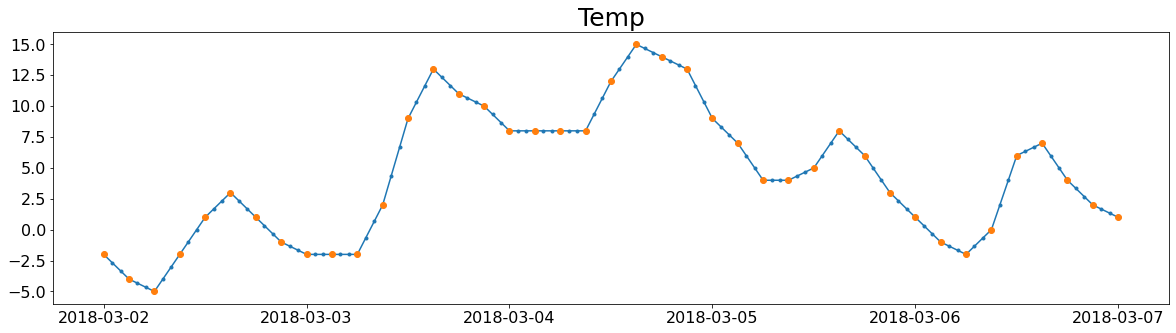

In [93]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Temp",fontsize=25)


days=5 #5일치만 시각화
plt.plot(inter_fcst_14.loc[:24*days, 'Forecast_time'], inter_fcst_14.loc[:24*days, 'Temperature'], '.-')
plt.plot(fcst_14_.loc[:24*days, 'Forecast_time'], fcst_14_.loc[:24*days, 'Temperature'], 'o')


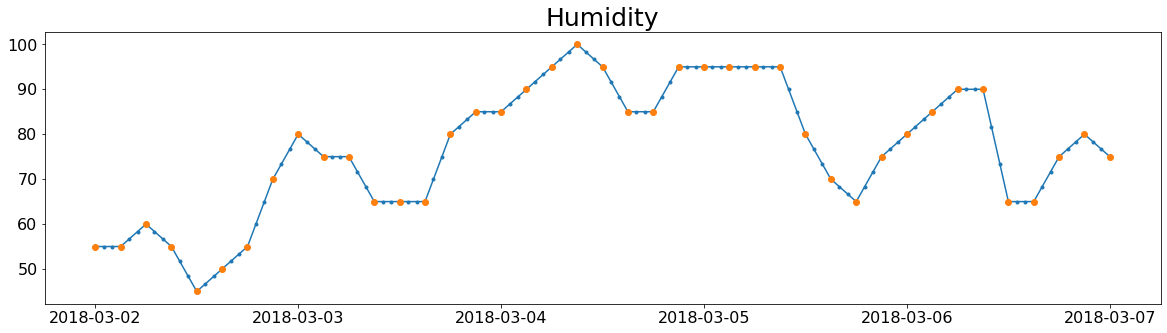

In [94]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Humidity",fontsize=25)



days=5 #5일치만 시각화
plt.plot(inter_fcst_14.loc[:24*days, 'Forecast_time'], inter_fcst_14.loc[:24*days, 'Humidity'], '.-')
plt.plot(fcst_14_.loc[:24*days, 'Forecast_time'], fcst_14_.loc[:24*days, 'Humidity'], 'o')

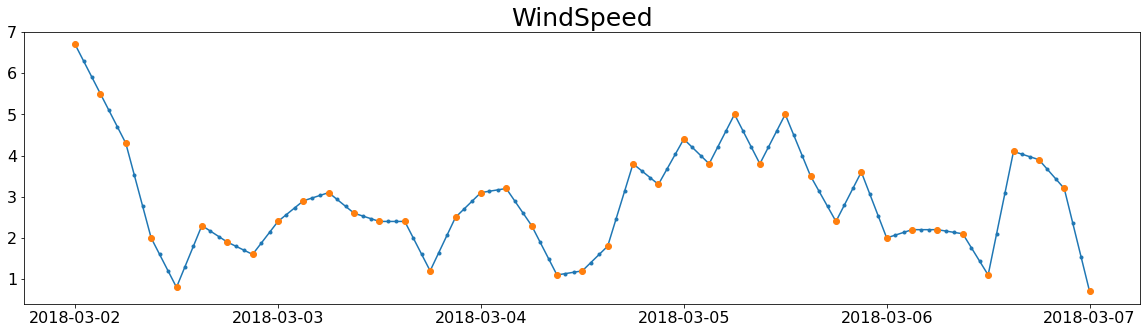

In [95]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("WindSpeed",fontsize=25)



days=5 #5일치만 시각화
plt.plot(inter_fcst_14.loc[:24*days, 'Forecast_time'], inter_fcst_14.loc[:24*days, 'WindSpeed'], '.-')
plt.plot(fcst_14_.loc[:24*days, 'Forecast_time'], fcst_14_.loc[:24*days, 'WindSpeed'], 'o')


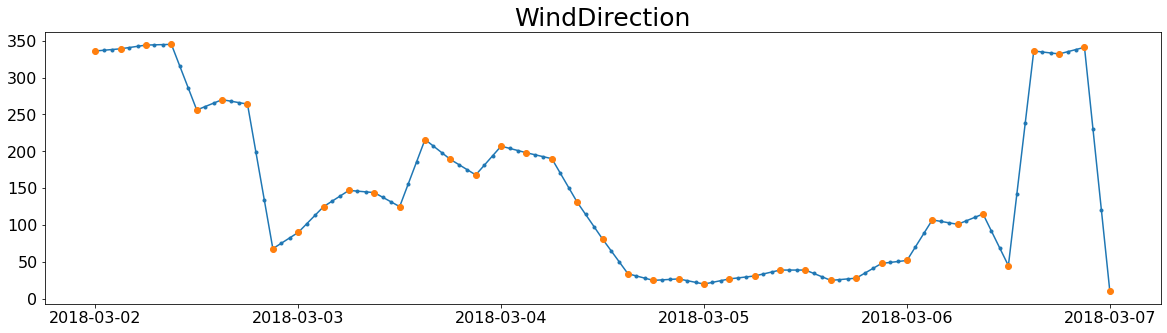

In [96]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("WindDirection",fontsize=25)



days=5 #5일치만 시각화
plt.plot(inter_fcst_14.loc[:24*days, 'Forecast_time'], inter_fcst_14.loc[:24*days, 'WindDirection'], '.-')
plt.plot(fcst_14_.loc[:24*days, 'Forecast_time'], fcst_14_.loc[:24*days, 'WindDirection'], 'o')


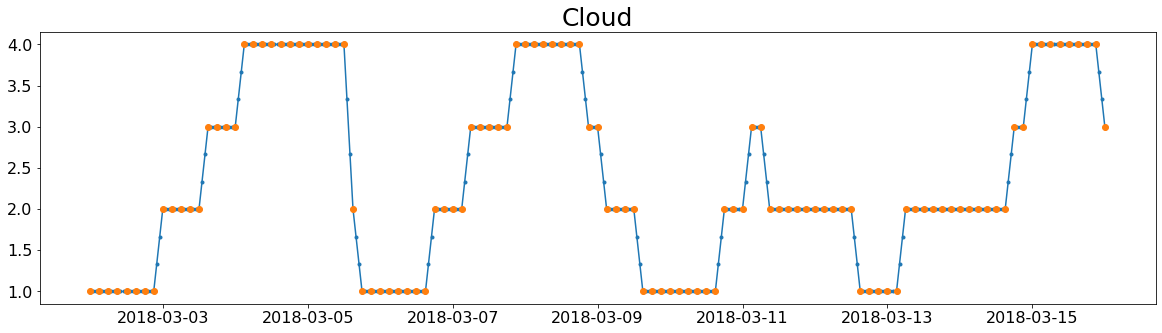

In [99]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Cloud",fontsize=25)



days=14 #5일치만 시각화
plt.plot(inter_fcst_14.loc[:24*days, 'Forecast_time'], inter_fcst_14.loc[:24*days, 'Cloud'], '.-')
plt.plot(fcst_14_.loc[:24*days, 'Forecast_time'], fcst_14_.loc[:24*days, 'Cloud'], 'o')


In [103]:
############3  csv로 내보내기
inter_fcst_14.to_csv('new_dj_fcst.csv',index=False)